**Linear Regression with Assumptions**

1. Regression analysis is one of the most widely used methods for prediction.

* Here I am explaining the linear regression algorithm with assumption.  

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

1. Linear regression is a **linear model**, e.g. a model that assumes a linear relationship between the input variables (x) and the single output variable (y).

2. More specifically, that y can be calculated from a linear combination of the input variables (x).

3. When there is a **single input variable (x)**, the method is referred to as simple linear regression and When more than **one input variable** multiple input variables.

4. Different techniques can be used to prepare or train the linear regression equation from data, the most common of which is called **Ordinary Least Squares**. It is common to therefore refer to a model prepared this way as Ordinary Least Squares Linear Regression or just Least Squares Regression.

**Linear Regression Equation:-**

>                                 y = B0 + B1*x

1. The linear equation assigns one scale factor to each input value or column, called a coefficient and represented by the capital Greek letter Beta (B). 

2. One additional coefficient is also added, giving the line an additional degree of freedom (e.g. moving up and down on a two-dimensional plot) and is often called the intercept or the bias coefficient.

3. In higher dimensions when we have more than one input (x), the line is called a plane or a hyper-plane.

**Types**

*    There are many more techniques because the model is so well studied. 

**1. Simple Linear Regression**

With simple linear regression when we have a single input, we can use statistics to estimate the coefficients.

This requires that you calculate statistical properties from the data such as means, standard deviations, correlations and covariance. All of the data must be available to traverse and calculate statistics.


**2. Ordinary Least Squares**

When we have more than one input we can use Ordinary Least Squares to estimate the values of the coefficients.

The Ordinary Least Squares procedure seeks to minimize the sum of the squared residuals. This means that given a regression line through the data we calculate the distance from each data point to the regression line, square it, and sum all of the squared errors together.

This approach treats the data as a matrix and uses linear algebra operations to estimate the optimal values for the coefficients. It means that all of the data must be available and you must have enough memory to fit the data and perform matrix operations.

**3. Gradient Descent**

When there are one or more inputs you can use a process of optimizing the values of the coefficients by iteratively minimizing the error of the model on your training data.

This operation is called Gradient Descent and works by starting with random values for each coefficient. The sum of the squared errors are calculated for each pair of input and output values. A learning rate is used as a scale factor and the coefficients are updated in the direction towards minimizing the error. The process is repeated until a minimum sum squared error is achieved or no further improvement is possible.

When using this method, you must select a learning rate (alpha) parameter that determines the size of the improvement step to take on each iteration of the procedure

**4. Regularization**

There are extensions of the training of the linear model called regularization methods. 

These seek to both minimize the sum of the squared error of the model on the training data (using ordinary least squares) but also to reduce the complexity of the model (like the number or absolute size of the sum of all coefficients in the model).

*  Two popular examples of regularization procedures for linear regression are:

**Lasso Regression:**
        where Ordinary Least Squares is modified to also minimize the absolute sum of the coefficients (called L1 regularization).
        
        
**Ridge Regression:**
        where Ordinary Least Squares is modified to also minimize the squared absolute sum of the coefficients (called L2 regularization).
These methods are effective to use when there is collinearity in your input values and ordinary least squares would overfit the training data.

1. Indenpendent variable(X=YearsExperience) and Dependent variable(y=Salary)

In [2]:
#import required library 

import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
# read the dataset 

df = pd.read_csv("Salary_Data.csv")

**EDA**

In [4]:
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [5]:
#check number of rows and number of columns
df.shape     #30 rows and 2 columns

(30, 2)

In [6]:
#check dataset information 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 612.0 bytes


* Here total 30 examples with no any missing values. 

* one columns is float and another is intger.

In [7]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [8]:
#check any missing values

df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [9]:
#any outliers

df.skew()

YearsExperience    0.37956
Salary             0.35412
dtype: float64

In [10]:
df.kurt()

YearsExperience   -1.012212
Salary            -1.295421
dtype: float64

* All values are approx. same

In [11]:
#check any correlation and covariance

df[['YearsExperience','Salary']].cov()

,YearsExperience,Salary
YearsExperience,8.053609,7.610630e+04
Salary,76106.303448,7.515510e+08


In [12]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


**Visualization**

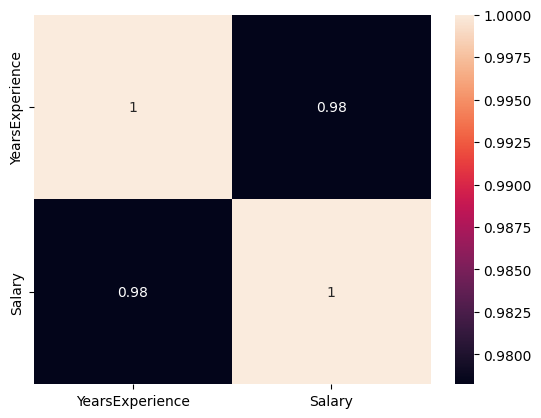

In [13]:
sns.heatmap(df.corr(),annot=True)
plt.show()

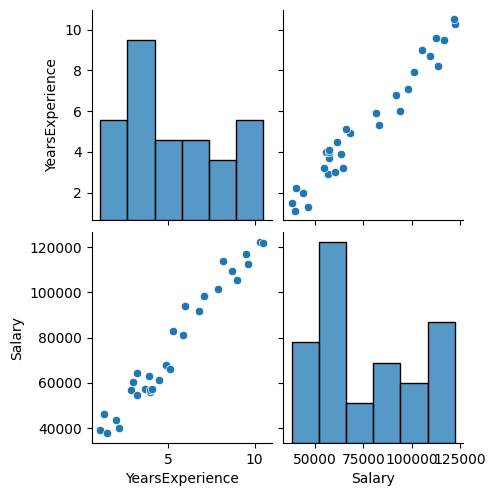

In [14]:
sns.pairplot(df)
plt.show()

* **Types of Line Style**

Syntax :- (data, ls='--')

1. Draw a dotted line style use as ':'

2. Draw a dashed line style use as '--'

3. Draw a dashdot line style use as '-.'

4. Draw a solid line style use as '-'  (by default)

* **Type of Line Color**

Syntax :- (data, color='r')

1. Use any color for example, color='r', 'b', 'g'

2. Alos use **Hexadecimal color values** 
          For Blue - #0000FF
          For DarkGreen - #006400
          For DarkRed - #8B000
          For DeepPink - #FF1493

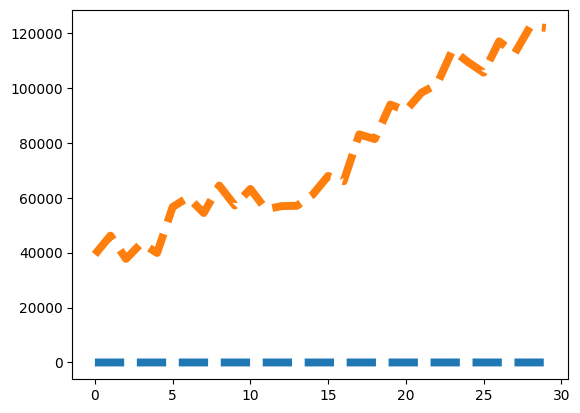

In [15]:
plt.plot(df, linestyle = '--', linewidth='5.7')

plt.show()

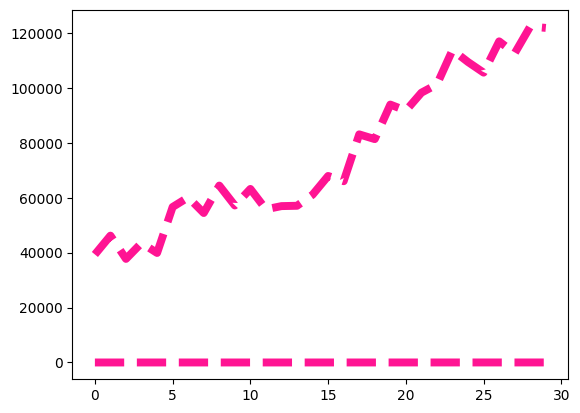

In [16]:
plt.plot(df, linestyle = '--', linewidth='5.7', color='#FF1493')

plt.show()

* Next Plot is Line Plot using data directly. 

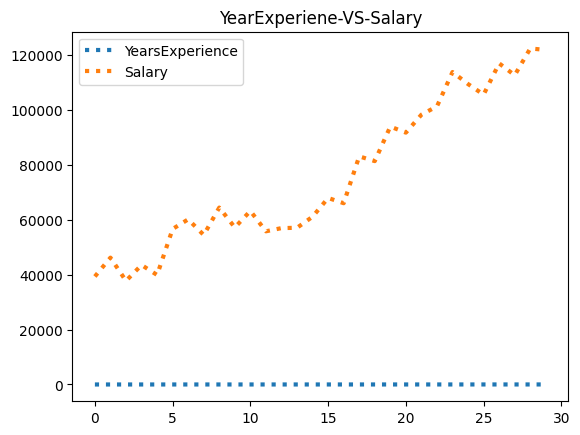

In [17]:
df.plot.line(linestyle = ':', linewidth='3')

plt.title('YearExperiene-VS-Salary')
plt.show()

**Plot a Specific Column**

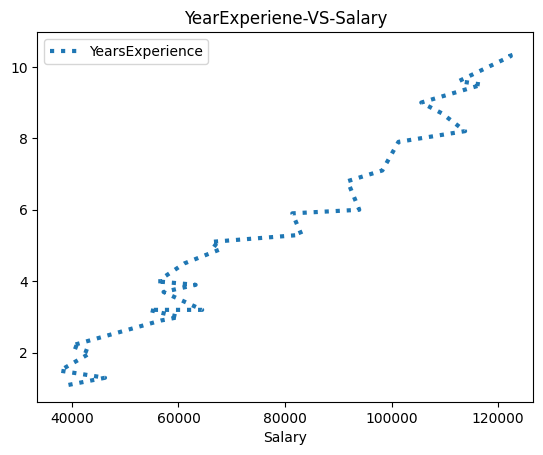

In [18]:

df = pd.DataFrame(data=df)

df.plot.line(x='Salary',linestyle = ':', linewidth='3')

plt.title('YearExperiene-VS-Salary')
plt.show()

1. * Here, clearly shows that linearly relationship between dependent and independent variable. 

**Independent and Dependent Variables**

In [19]:
X=df.drop('Salary',axis=1)

In [20]:
y=df.Salary

In [21]:
X.head()

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2


In [22]:
y.head()

0    39343
1    46205
2    37731
3    43525
4    39891
Name: Salary, dtype: int64

**Splitting the data**

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.30)

In [25]:
print(X_train.shape)

(21, 1)


In [26]:
X_test.shape

(9, 1)

**Model Fitting**

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
LR=LinearRegression()

In [29]:
LR.fit(X_train,y_train)

LinearRegression()

In [30]:
LR.intercept_   # beta 0

np.float64(26777.391341197625)

In [31]:
LR.coef_        # beta 1

array([9360.26128619])

**Prediction**

In [32]:
y_pred=LR.predict(X_test)

In [33]:
y_pred

array([ 40817.78327049, 123188.08258899,  65154.46261459,  63282.41035735,
       115699.87356004, 108211.66453108, 116635.89968866,  64218.43648597,
        76386.77615802])

In [34]:
y_test

2      37731
28    122391
13     57081
10     63218
26    116969
24    109431
27    112635
11     55794
17     83088
Name: Salary, dtype: int64

**Evaluation**

In [35]:
from sklearn import metrics

In [36]:
R2=metrics.r2_score(y_test,y_pred)

In [37]:
R2

0.9740993407213511

In [38]:
print(metrics.mean_absolute_error(y_test,y_pred))

3737.417861878896


In [39]:
print(metrics.mean_squared_error(y_test,y_pred))

23370078.800832972


In [40]:
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

4834.260936361728


In [41]:
print(LR.predict([[5]])) 

[73578.69777217]


**Assumptions**

In [42]:
error= y_test-y_pred

In [43]:
error

2    -3086.783270
28    -797.082589
13   -8073.462615
10     -64.410357
26    1269.126440
24    1219.335469
27   -4000.899689
11   -8424.436486
17    6701.223842
Name: Salary, dtype: float64

**No Autocorrelation**

In [44]:
import statsmodels.api as smt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

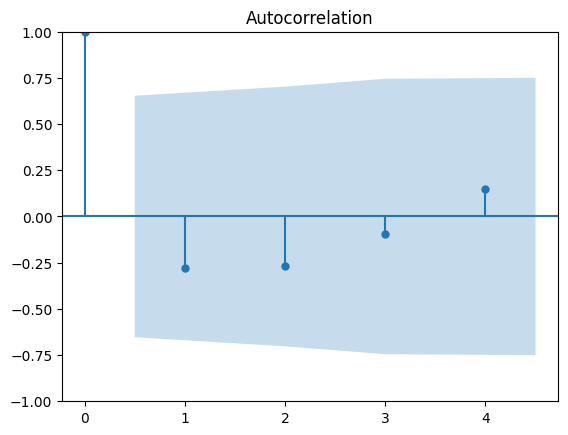

In [45]:
acf=plot_acf(error)
plt.show()

**Normality**

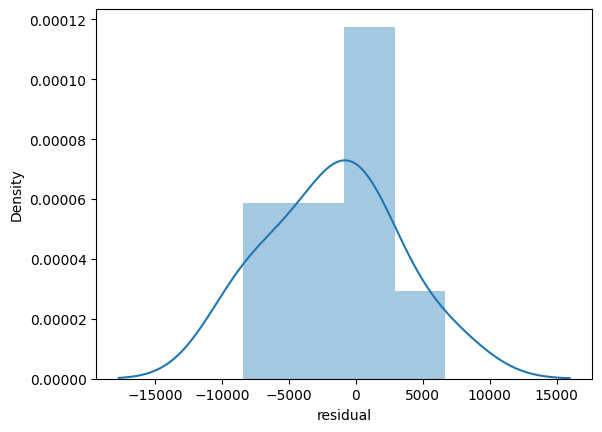

In [46]:
sns.distplot(error)
plt.xlabel('residual')
plt.show()

**Linearity**

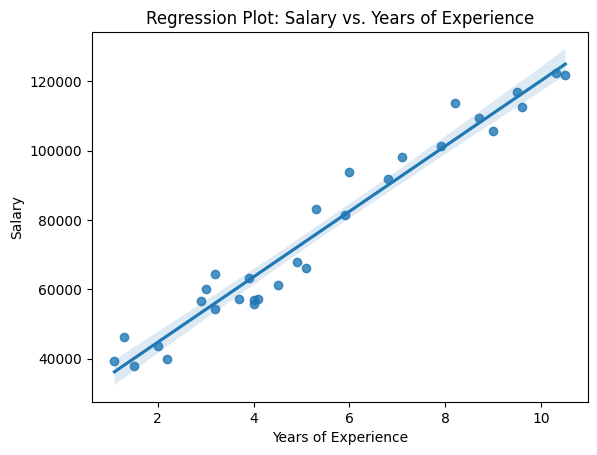

In [47]:
# Assuming `X` is a DataFrame with 'YearsExperience' column and `y` is the salary Series
sns.regplot(x=X['YearsExperience'], y=y)
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Regression Plot: Salary vs. Years of Experience')
plt.show()

**Homoscedasticity**

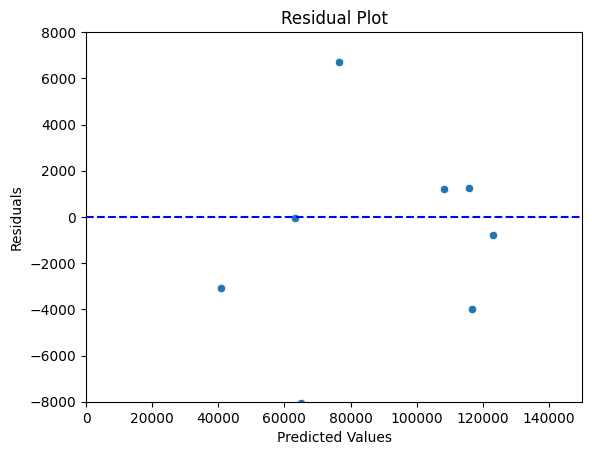

In [48]:
# Convert y_pred to a Series with matching indices
y_pred_series = pd.Series(y_pred, index=error.index)

# Residual plot
sns.scatterplot(x=y_pred_series, y=error)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.xlim([0, 150000])
plt.ylim([-8000, 8000])
plt.axhline(0, color='blue', linestyle='--')  # horizontal reference line
plt.title('Residual Plot')
plt.show()

**Multicollinearity**

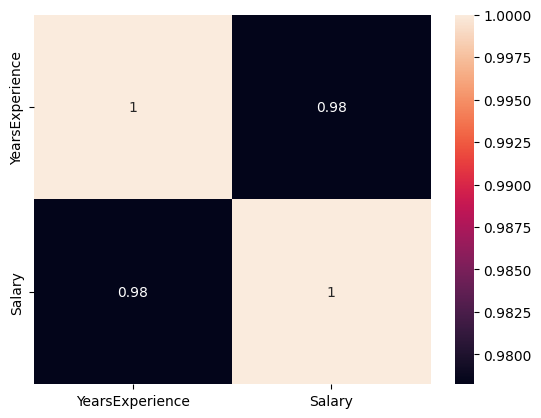

In [49]:
sns.heatmap(df.corr(),annot=True)
plt.show()